100


c:\nrn\lib\python\neuron\__init__.py:944: MatplotlibDeprecationWarning: Setting the line's pick radius via set_picker is deprecated since 3.3 and will be removed two minor releases later; use set_pickradius instead.
  line, = self.plot(xs, ys, zs, '-', **kwargs)


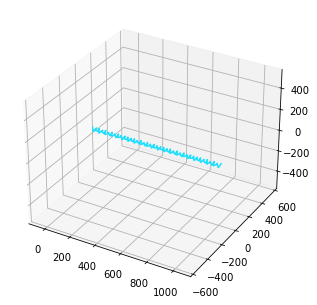


|----------------------------------------------------------------------------------------------------|       soma(0-1)



1.0

In [1]:
from neuron import h
import numpy as np
from matplotlib import pyplot

soma = h.Section(name='soma')
soma.nseg = 100
soma.Ra = 100
soma.L = 1000
diam = np.random.randint(1,10,101)
for i,seg in enumerate(soma.allseg()):
    seg.diam = diam[i-1]
theta = np.linspace(0, 1000, 100)
print(np.size(theta))
y = 17 * np.sin(theta)
z = 17 * np.cos(theta)
xvec = h.Vector(theta)
yvec = h.Vector(y)
zvec = h.Vector(z)
dvec = h.Vector([1] * len(theta))
h.pt3dadd(xvec, yvec, zvec, dvec, sec=soma)

soma.insert('hh')
for i,seg in enumerate(soma):
    seg.hh.gnabar = 0.12  # Sodium conductance in S/cm2
    seg.hh.gkbar = 0.036  # Potassium conductance in S/cm2
    seg.hh.gl = 0.0003    # Leak conductance in S/cm2
    seg.hh.el = -54.3     # Reversal potential in mV
#stim = h.IClamp(soma(0.5))
#stim.delay = 10
#stim.dur = 1
#stim.amp = 0.001
ps = h.PlotShape(True)
ps.plot(pyplot)
pyplot.show()

v_vec = h.Vector()        # Membrane potential vector
t_vec = h.Vector()        # Time stamp vector
v_vec.record(soma(0.5)._ref_v)
t_vec.record(h._ref_t)
simdur = 25.0
h.load_file('stdrun.hoc')
h.finitialize(-70)
h.continuerun(40)
h.topology()

In [2]:
from mayavi import mlab
for i in range(100):
    mlab.plot3d(theta,y,z,tube_radius = diam[i])
mlab.show()

In [11]:
import numpy as np
a = np.array([1,2,3,4,5,6,7])
b = np.array(np.meshgrid(a, a))
for i in range(np.size(a)):
    for j in range(i,np.size(a)):
        print(b[0,j,i],b[1,j,i])

1 1
1 2
1 3
1 4
1 5
1 6
1 7
2 2
2 3
2 4
2 5
2 6
2 7
3 3
3 4
3 5
3 6
3 7
4 4
4 5
4 6
4 7
5 5
5 6
5 7
6 6
6 7
7 7
